# Assignment 4: Sequence Alignment and Evolution

## 1. BLAST search

Screeshot of BLAST parameters shown below.

<img src="images/BLAST1.png" />

<img src="images/BLAST2.png" />

## 2. Multiple sequence alignment

- added the query sequence to the BLAST output file
- translated the sequences into amino acids
- Used MAFFT to align them.

Commandline Code shown below:

In [99]:
%%bash
cat week4_query.fa seqdump.txt > query_and_blast.fa

In [100]:
%%bash
transeq query_and_blast.fa aa_query_blast.fa

Translate nucleic acid sequences


In [102]:
%%bash
mafft --auto --thread -1 aa_query_blast.fa > align_aa2.txt

OS = darwin
The number of physical cores =  2
nthread = 2
nthreadpair = 2
nthreadtb = 2
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 1793 ambiguous characters.
 1001 / 1001 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  990 / 1001
done.

Progressive alignment 1/2... 
STEP   401 / 1000 (thread    0) f
Reallocating..done. *alloclen = 8413
STEP   901 / 1000 (thread    1) f
Reallocating..done. *alloclen = 9761

done.

Making a distance matrix from msa.. 
  900 / 1001 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  990 / 1001
done.

Progressive alignment 2/2... 
STEP   601 / 1000 (thread    1) f
Reallocating..done. *alloclen = 8421
STEP   901 / 1000 (thread    0) f
Reallocating..done. *alloclen = 9757

done.

disttbfast (aa) Version 7.471
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
2 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (

## 3. Converting back to nucleotides

- converted the amino acid sequences back to nucleotides with the added gaps

In [132]:
#FASTA Parser

def FASTAReader(file):
    # Get the first line, which should contain the sequence name
    line = file.readline()
    # Let's make sure the file looks like a FASTA file
    assert line.startswith('>'), "Not a FASTA file"
    
    # Get the sequence name
    seq_id = line[1:].rstrip('\r\n')
    # create a list to contain the 
    sequence = []
    # Get the next line
    line = file.readline()
    # Add a list to hold all of the sequences in
    sequences = []
    # Keep reading lines until we run out
    while line:
        # Check if we've reached a new sequence (in a multi-sequence file)
        if line.startswith('>'):
            # Add previous sequence to list
            sequences.append((seq_id, ''.join(sequence)))
            
            # Record new sequence name and reset sequence
            seq_id = line[1:].rstrip('\r\n')
            sequence = []
        else:
            # Add next chunk of sequence
            sequence.append(line.strip())
        
        # Get the next line
        line = file.readline()
    # Add the last sequence to sequences
    sequences.append((seq_id, ''.join(sequence)))
    return sequences

In [105]:
#open both files with the FASTA Parser  

aa = FASTAReader(open('align_aa2.txt')) 
dna = FASTAReader(open('query_and_blast.fa'))

#took out the query sequence in both
query_aa = aa[0]
query_dna = dna [0]

In [137]:
#Adding gaps to the query sequence

#new list to add the files to
query_gaps = [] 

#counter for the sequences
j = 0

for i in query_aa[1]: 
    if i == '-':
        query_gaps.append('---')
    else:
        query_gaps.append(query_dna[1][(j*3):(j*3 + 3)]) 
        #for every letter in the aa sequence, 
        #it will add 3 letters in dna sequence
        j += 1 #counts the letters in each loop 
        
print(query_gaps[:200])

['---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', 'ATG', 'TCT', 'AAG', 'AAA', '---', '---', '---', '---', '---', '---', '---', '---', 'CCA', 'GGA', 'GGG', '---', '---', '---', 'CCC', 'GGT', 'AAA', 'AAC', 'CGG', 'GCT', 'GTC', 'AAT', 'ATG', 'CTA', 'AAA', 'CGC', 'GGT', '---', 'ATG', '---', 'CCC', 'CGC', 'GGA', 'TTG', 'TCC'

In [135]:
#Adding gaps to the aligned sequence

#list to create a list of list, each loop will add to the master list
align_gaps = [] 

for amino, nt in zip(aa[1:], dna[1:]):
    j = 0 
    #temporary list to add the gaps and sequences to
    tmp_gaps = []
    
    for aa_seq in amino[1]:
        if aa_seq == '-':
            tmp_gaps.append('---')
        else:
            tmp_gaps.append(query_dna[1][(j*3):(j*3 + 3)]) 
            j += 1 #counts the letters in each loop  
    align_gaps.append(tmp_gaps)

print(align_gaps[0][:100])

['---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', 'ATG', 'TCT', 'AAG', 'AAA', 'CCA', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', '---', 'GGA', 'GGG', 'CCC', 'GGT', 'AAA', 'AAC', 'CGG', 'GCT', '---', '---', '---', '---', '---', '---', 'GTC', 'AAT', '---', 'ATG', 'CTA', 'AAA', 'CGC', '---', '---', '---', '---', '---', '---', '---', '---', 'GGT', 'ATG', 'CCC', 'CGC', 'GGA', 'TTG', 'TCC']


## 4. Looking for selection

- Count the number of synonymous and non-synonymous codon changes
- sum the changes per codon
- find the difference for the Z test, then do Z test
- plot the z-score for each codon and highlight significant points

In [109]:
codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}

In [139]:
#align_gaps is list of lists
#query_gaps is list of codons only


#list for each 
S_val = []
N_val = []

for ind, seq in enumerate(align_gaps):
    #temporary list for each 
    dS = []
    dN = []
    #comparing the codons together
    for codon_que, codon_ali in zip(query_gaps, seq):
        #skipping gaps in query and alignment sequences
        if codon_que == '---' and codon_ali == '---':
            continue
        if codon_ali != '---' and codon_que == '---':
            continue
        #added place holders 
        if codon_ali == '---' and codon_que != '---':
            dS.append(0)
            dN.append(0)
            continue
        if codon_que == codon_ali:
            dS.append(0)
            dN.append(0)
            continue
        if codon_ali not in codontable:
            dS.append(0)
            dN.append(0)
            continue
        #adding to temp list based on synonymous & non-synonymous changes
        if codon_ali in codontable:
            if codontable[codon_que] == codontable[codon_ali]:
                dS.append(1)
                dN.append(0)
            else:
                dS.append(0)
                dN.append(1)
    #append list after loop to master list
    S_val.append(dS)
    N_val.append(dN)

    
print(S_val[0][:200])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [141]:
#flatten the nested list to get the sum of each codon
S_sum = list(map(sum, zip(*S_val))) 
N_sum = list(map(sum, zip(*N_val))) 


#create a list of the differences between dS and dN

D_lst = []

for dS, dN in zip(S_sum, N_sum):
    D = dN - dS
    D_lst.append(D)

print(D_lst[:15])

[688, 856, 831, 682, 805, 800, 753, 883, 531, 859, 878, 510, 722, 893, 889]


In [143]:
#load packages
import numpy as np

#standard deviation for the differences -> used in Z-Test
standard = stats.tstd(D_lst)

#datafrane of the differences
z_score = pd.DataFrame(D_lst, columns= ['D'])

#added colums for z scores, dN, dS
z_score['z_score'] = (z_score['D'] - 0)/ standard #Z test
z_score['dN'] = N_sum
z_score['dS'] = S_sum

#column for ratio of dN/dS
z_score['dN/dS'] = np.log2(z_score['dN']/z_score['dS'])

#for plot make sure there is no inf
z_score.replace(np.inf, np.nan, inplace = True)

z_score

,D,z_score,dN,dS,dN/dS
0,688,3.803112,688,0,NaN
1,856,4.731779,872,16,5.768184
2,831,4.593584,839,8,6.712527
3,682,3.769945,745,63,3.563817
4,805,4.449862,808,3,8.073249
...,...,...,...,...,...
3425,185,1.022639,189,4,5.562242
3426,179,0.989472,184,5,5.201634
3427,186,1.028167,189,3,5.977280
3428,95,0.525139,99,4,4.629357


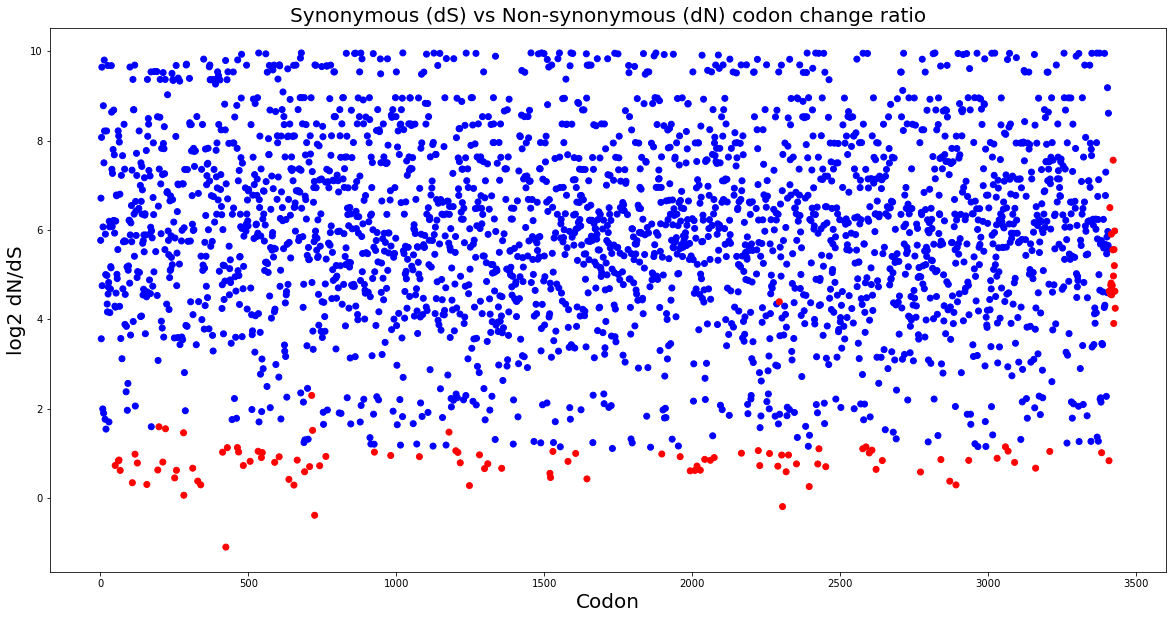

In [155]:
import matplotlib.pyplot as plt

# sig_z = []

# if z_score['z_score'] > -1.96 or z_score['z_score'] < 1.96:
#     sig_z.append(z_score['z_score'])

fig, ax = plt.subplots(figsize = (20,10))
colors = ['blue' if z_score > 1.96 or z_score < -1.96 
          else 'red' for z_score in z_score['z_score']]
ax.scatter(x = z_score.index, y = z_score['dN/dS'], color = colors)
ax.set_title('Synonymous (dS) vs Non-synonymous (dN) codon change ratio', fontsize=20)
ax.set_ylabel('log2 dN/dS', fontsize=20)
ax.set_xlabel('Codon', fontsize=20)

plt.show()